# Haberman Cancer Survival Dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
haberman = pd.read_csv("haberman.csv")
print (haberman.columns)


Index(['age', 'operation_year', 'auxillary_nodes', 'survival'], dtype='object')


In [3]:

age = dict(haberman["age"].value_counts())
age

{30: 3,
 31: 2,
 33: 2,
 34: 7,
 35: 2,
 36: 2,
 37: 6,
 38: 10,
 39: 6,
 40: 3,
 41: 10,
 42: 9,
 43: 11,
 44: 7,
 45: 9,
 46: 7,
 47: 11,
 48: 7,
 49: 10,
 50: 12,
 51: 6,
 52: 14,
 53: 11,
 54: 13,
 55: 10,
 56: 7,
 57: 11,
 58: 7,
 59: 8,
 60: 6,
 61: 9,
 62: 7,
 63: 8,
 64: 5,
 65: 10,
 66: 5,
 67: 6,
 68: 2,
 69: 4,
 70: 7,
 71: 1,
 72: 4,
 73: 2,
 74: 2,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 83: 1}

There are more patient from age between 40 to 65 

and less patient for ages less than 40 or more than 65

In [52]:
haberman["survival"].value_counts()

1    225
2     81
Name: survival, dtype: int64

More patient undergone surgery survived

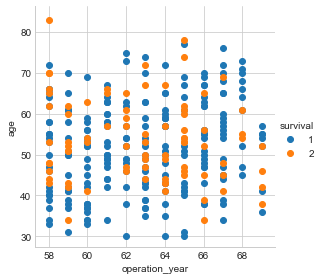

In [11]:
#2-D Scatter Plot
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival", size=4) \
   .map(plt.scatter, "operation_year", "age") \
   .add_legend();
plt.show();

1.Almost all patient from 30 to 40 year of ages survived

2.But it is hard to determine survival of patient for other age group as there is lot of overlapping

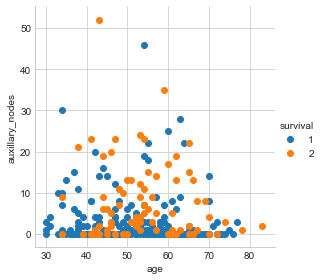

In [56]:
plt.close()
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival", size=4) \
   .map(plt.scatter, "age", "auxillary_nodes") \
   .add_legend();
plt.show();

Most of patient have auxillary node between 0 to 10

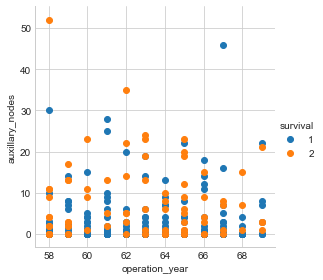

In [60]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival", size=4) \
   .map(plt.scatter, "operation_year", "auxillary_nodes") \
   .add_legend();
plt.show();

Nothing conclusive from this as node distribution look normal

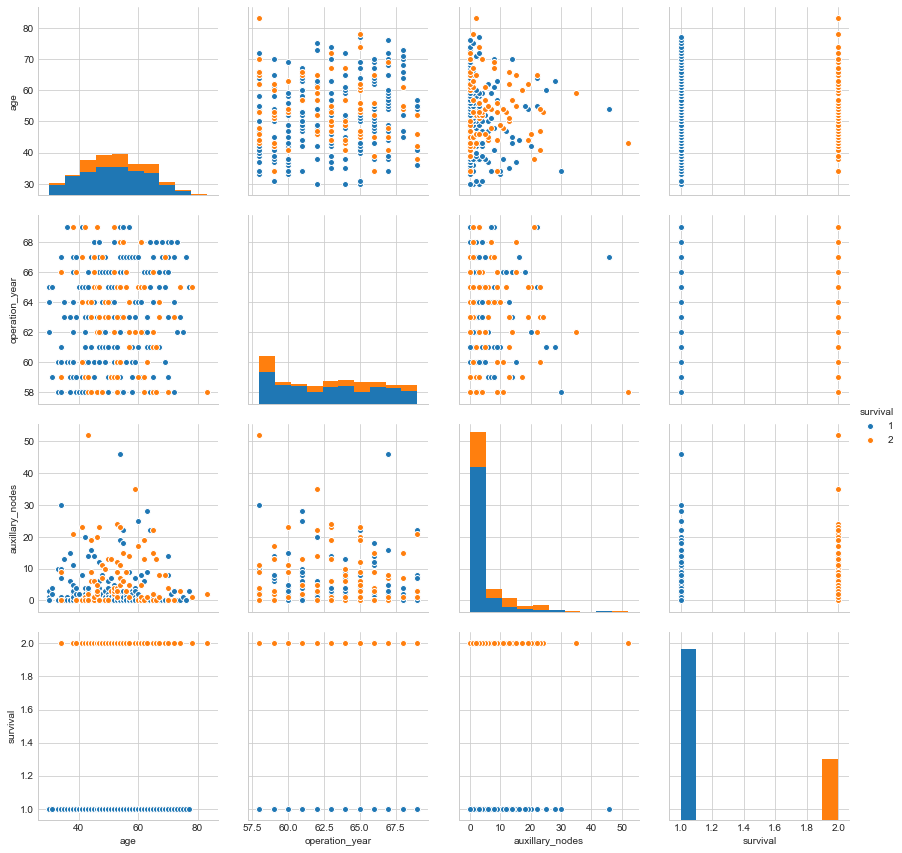

In [12]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival", size=3);
plt.show()

Age , year of operation , auxillary node have some small points by which we can get some conclusion

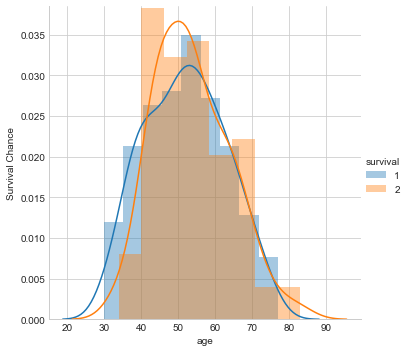

In [16]:
plt.close();
sns.FacetGrid(haberman, hue="survival", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel("Survival Chance")
plt.show();

Observations : 

Survival chances of patient by age categorised in 3 types

1. Age group 30 to 40 chances of survival of patient is sligthly higher

2. Age group 40 to 60 chances of survival of patient is lower

    

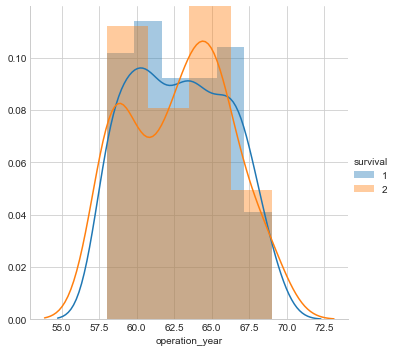

In [63]:
plt.close();
sns.FacetGrid(haberman, hue="survival", size=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.show();

Distribution is normal hence no proper conclusion can be made

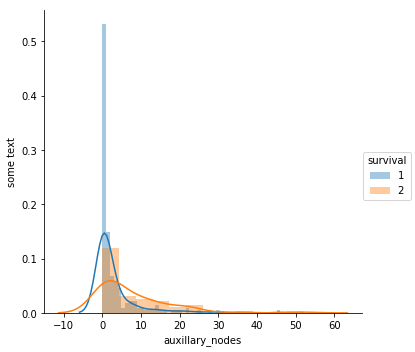

In [9]:
plt.close();
sns.FacetGrid(haberman, hue="survival", size=5) \
   .map(sns.distplot, "auxillary_nodes") \
   .add_legend();
plt.ylabel('some text')
plt.show();

Survival chances are high if auxillary nodes are lower

After all above plots auxillary node graph look more conclusive compare to other

In [48]:
survived = haberman.loc[haberman["survival"] == 1];
not_survived = haberman.loc[haberman["survival"] == 2];

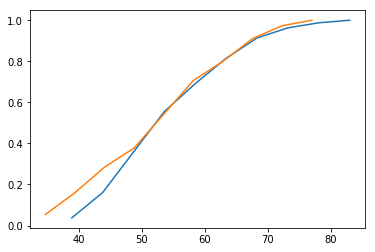

In [30]:
plt.close();
counts, bin_edges = np.histogram(not_survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(survived['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

There are very few patient whose age below 40 survived

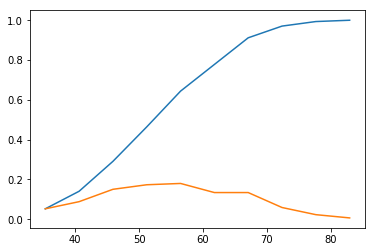

In [51]:
counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges[1:],pdf)

plt.show();

More than 75% patient lies between 40 to 65 age group

Chances of cancer reduces as age increase

In [36]:
print("Survived age mean : "+str(np.mean(survived["age"])))
print("Not Survived age mean : "+str(np.mean(not_survived["age"])))

print("Survived age std deviation : "+str(np.std(survived["age"])))
print("Not Survived age std deviation : "+str(np.std(not_survived["age"])))

Survived age mean : 52.01777777777778
Survived age mean : 53.67901234567901
Survived age std deviation : 10.987655475100508
Survived age std deviation : 10.104182193031312


In [49]:
print("Patient age mean : "+str(np.mean(haberman["age"])))
print("Patient age std deviation : "+str(np.std(haberman["age"])))

Patient age mean : 52.45751633986928
Patient age std deviation : 10.785785203631832


There are not much conclution from mean and std deviation as they are almost 
same in all cases

In [54]:
print("Survived nodes mean : "+str(np.mean(survived["auxillary_nodes"])))
print("Not Survived nodes mean : "+str(np.mean(not_survived["auxillary_nodes"])))

print("Survived nodes std deviation : "+str(np.std(survived["auxillary_nodes"])))
print("Not Survived nodes std deviation : "+str(np.std(not_survived["auxillary_nodes"])))

print("Patient nodes mean : "+str(np.mean(haberman["auxillary_nodes"])))
print("Patient nodes std deviation : "+str(np.std(haberman["auxillary_nodes"])))

Survived nodes mean : 2.7911111111111113
Not Survived nodes mean : 7.45679012345679
Survived nodes std deviation : 5.857258449412138
Not Survived nodes std deviation : 9.128776076761635
Patient nodes mean : 4.026143790849673
Patient nodes std deviation : 7.177896092811143


Patient with less nodes are more likely to survive

In [58]:
print("\n Survived")
print(np.percentile(survived["auxillary_nodes"],np.arange(0, 100, 25)))
print("\n Not Survived")
print(np.percentile(not_survived["auxillary_nodes"],np.arange(0, 100, 25)))
print("\n Patient")
print(np.percentile(haberman["auxillary_nodes"],np.arange(0, 100, 25)))


 Survived
[0. 0. 0. 3.]

 Not Survived
[ 0.  1.  4. 11.]

 Patient
[0. 0. 1. 4.]


Survived patient have very less auxillary nodes

Even though few patients have less nodes they were not survived

In [61]:
print("\n Survived")
print(np.percentile(survived["auxillary_nodes"],90))
print("\n Not Survived")
print(np.percentile(not_survived["auxillary_nodes"],90))
print("\n Patient")
print(np.percentile(haberman["auxillary_nodes"],90))


 Survived
8.0

 Not Survived
20.0

 Patient
13.0


90% patient survived have 8 auxillary nodes against not survived patient who have 20 auxillary nodes 

In [65]:
print("Survival rate of operation : " + str((len(survived) / len(haberman))*100) + " %")

Survival rate of operation : 73.52941176470588 %


More than 73% operation patient survived

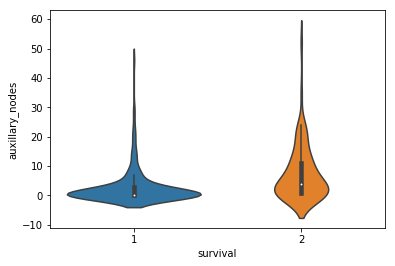

In [66]:
sns.violinplot(x="survival", y="auxillary_nodes", data=haberman, size=8)
plt.show()

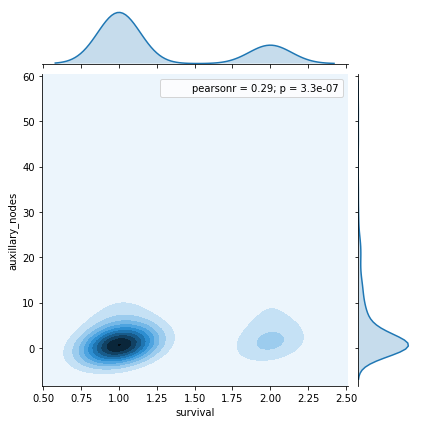

In [67]:
sns.jointplot(x="survival", y="auxillary_nodes", data=haberman, kind="kde");
plt.show();

Lesser nodes more chances to survive

Very few patient who have less node are failed to survive and very few patient have more nodes are survived